In [1]:
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import statistics
from scipy import stats

In [3]:
#aim here is to trace the players who are in high demand

In [68]:
df=pd.read_csv("english_premier_league.csv")

In [69]:
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Manchester City,Rodri,23,Defensive Midfield,Atlético Madrid,£63.00m,in,63.0,Premier League,2019,2019/2020
1,Manchester City,João Cancelo,25,Right-Back,Juventus,£58.50m,in,58.5,Premier League,2019,2019/2020
2,Manchester City,Pedro Porro,19,Right-Back,Girona,£10.80m,in,10.8,Premier League,2019,2019/2020
3,Manchester City,Angeliño,22,Left-Back,PSV Eindhoven,£10.80m,in,10.8,Premier League,2019,2019/2020
4,Manchester City,Zack Steffen,24,Goalkeeper,Columbus Crew,£7.20m,in,7.2,Premier League,2019,2019/2020


In [70]:
df.describe()

,age,fee_cleaned,year
count,563.000000,479.000000,563.0
mean,25.042629,4.465180,2019.0
std,4.413054,11.542427,0.0
min,17.000000,0.000000,2019.0
25%,22.000000,0.000000,2019.0
50%,24.000000,0.000000,2019.0
75%,28.000000,2.455000,2019.0
max,40.000000,90.000000,2019.0


In [71]:
col=df.columns

In [72]:
#finding_missing_values

In [73]:
df.isna()[0:2]

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False


In [74]:
df_na=df.isna()
n2=[]
for i in np.arange(len(col)):
    c=col[i]
    s1=0
    for j in np.arange(len(df_na[c])):
        n1=int(df_na[c][j])
        s1=s1+n1
    n2=np.append(n2,s1)   

In [75]:
DataFrame([col,n2]).T          #one missing section found

,0,1
0,club_name,0
1,player_name,0
2,age,0
3,position,0
4,club_involved_name,0
5,fee,0
6,transfer_movement,0
7,fee_cleaned,84
8,league_name,0
9,year,0


In [76]:
f1=np.where(df["fee_cleaned"].isna()==True)
f1

(array([ 27,  29,  30,  31,  43,  60,  61,  95,  96,  97, 118, 119, 142,
        143, 144, 145, 162, 164, 165, 173, 175, 189, 191, 192, 209, 227,
        228, 230, 231, 245, 252, 256, 264, 265, 278, 279, 280, 281, 288,
        289, 290, 312, 318, 319, 326, 327, 338, 339, 347, 372, 383, 389,
        390, 391, 392, 393, 415, 416, 445, 446, 447, 466, 468, 480, 481,
        482, 483, 484, 502, 503, 504, 512, 513, 514, 516, 517, 518, 522,
        546, 547, 548, 549, 551, 554], dtype=int64),)

In [77]:
s1=0
f2=(np.where(df["fee_cleaned"].isna()==False))[0]
for i in f2:
    s1=s1+(df["fee_cleaned"][i])
m=s1/len(f2)

In [78]:
df_t1=DataFrame(df["fee_cleaned"])
df_t1=df_t1.fillna(value=m)

In [79]:
df["fee_cleaned"]=df_t1.values

In [80]:
for i in np.arange(len(df["fee"])):
    if df["fee"][i][0:1]!="£":
        df["fee"][i]=0

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
#EDA(visualization and discripitve statistics)

In [16]:
df.head(2)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Manchester City,Rodri,23,Defensive Midfield,Atlético Madrid,£63.00m,in,63.0,Premier League,2019,2019/2020
1,Manchester City,João Cancelo,25,Right-Back,Juventus,£58.50m,in,58.5,Premier League,2019,2019/2020


In [17]:
dfc=(DataFrame(pd.get_dummies(df["club_name"])))
clb=DataFrame(np.sum(dfc),columns=["team"])

In [18]:
(clb["team"]).describe()

count    20.000000
mean     28.150000
std       8.554931
min      15.000000
25%      20.500000
50%      29.000000
75%      35.500000
max      42.000000
Name: team, dtype: float64

Text(0, 0.5, 'frequency')

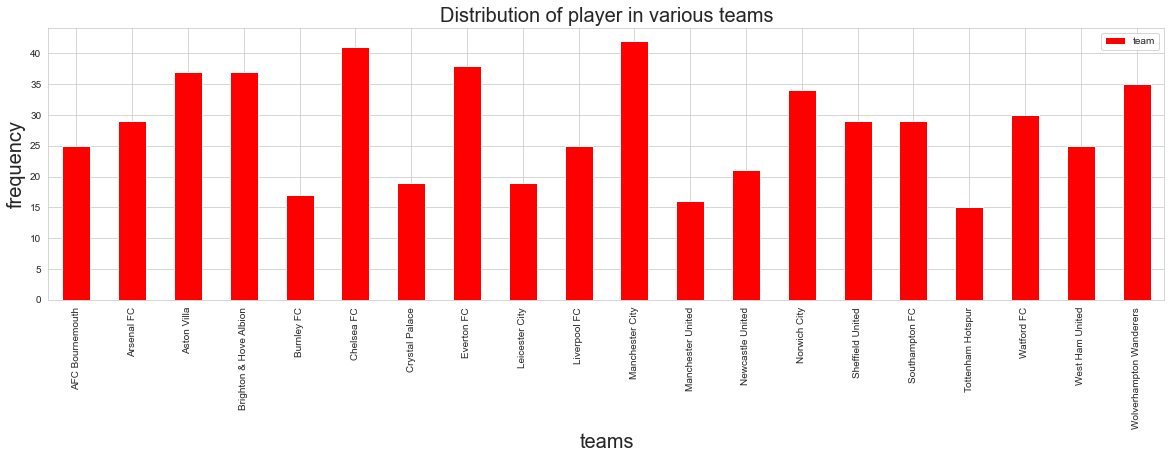

In [19]:
clb.plot(kind="bar",figsize=(20,5),color="red")
plt.title("Distribution of player in various teams",fontsize=20)
plt.xlabel("teams",fontsize=20)
plt.ylabel("frequency",fontsize=20)

In [20]:
df["age"].describe()

count    563.000000
mean      25.042629
std        4.413054
min       17.000000
25%       22.000000
50%       24.000000
75%       28.000000
max       40.000000
Name: age, dtype: float64

Text(0, 0.5, 'Density')

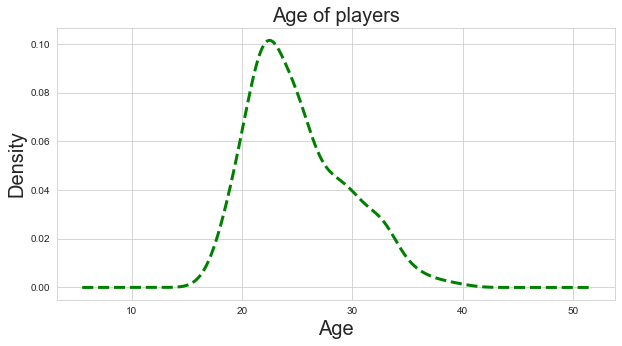

In [21]:
df["age"].plot(kind="kde",color="green",figsize=(10,5),linewidth=3,linestyle="--")
plt.title("Age of players",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Density",fontsize=20)

In [22]:
dfp=(DataFrame(pd.get_dummies(df["position"])))
pos=DataFrame(np.sum(dfp),columns=["position"])
pos

,position
Attacking Midfield,21
Central Midfield,87
Centre-Back,81
Centre-Forward,106
Defensive Midfield,25
Goalkeeper,59
Left Midfield,9
Left Winger,47
Left-Back,31
Midfielder,1


In [23]:
df_bc=(DataFrame(pd.get_dummies(df["club_involved_name"])))
bc=DataFrame(np.sum(df_bc),columns=["base_club"])
bc

,base_club
1.FK Pribram,2
1.FSV Mainz 05,3
AC Milan,2
AEK Athens,1
AS Roma,4
...,...
Without Club,16
Wolves,1
Wycombe,4
Würzb. Kickers,1


In [24]:
f=[]
for i in np.arange(len(df["fee"])):
    if df["fee"][i]=="£" or df["fee"][i]!=0:
        f=np.append(f,df["fee"][i])

In [25]:
f2=[]
for i in np.arange(len(f)):
    f1=f[i][1:]
    f11=f1[:-1]
    if f[i][-1:]=="m":
        f2=np.append(f2,float(f11))
    else:
        f2=np.append(f2,(float(f11)/1000))

In [26]:
fz=len(df["fee"])-len(f)

([<matplotlib.patches.Wedge at 0x1535fe57080>,
 [Text(-1.4519198325616016, 1.316635408841146, 'on loan'),
  Text(1.3778422315925174, -1.249460197381314, 'salary paid')],
 [Text(-0.8592994927405395, 0.7792332011508822, '76.6%'),
  Text(0.7852219169290691, -0.7120579619484906, '23.4%')])

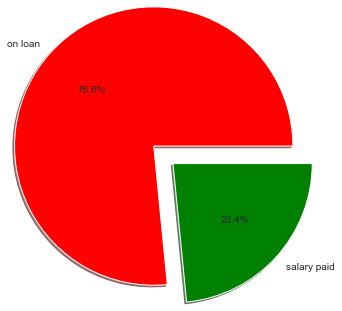

In [27]:
plt.pie([fz,len(f2)],labels=["on loan","salary paid"],radius=1.6,shadow=True,explode=[.2,.1],colors="rgba",autopct='%1.1f%%')

Text(0, 0.5, 'frequency')

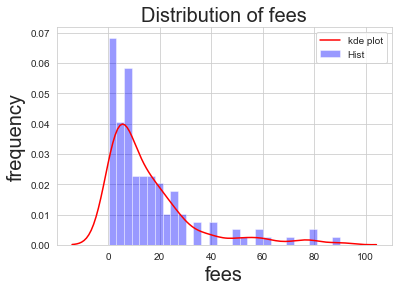

In [28]:
sns.distplot(f2,bins=30,
              kde_kws={"color":"red","label":"kde plot"},
              hist_kws={"color":"blue","label":"Hist"})
plt.title("Distribution of fees",fontsize=20)
plt.xlabel("fees",fontsize=20)
plt.ylabel("frequency",fontsize=20)

In [29]:
#the players who are in  are in maximum demand

In [32]:
df.head(1)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Manchester City,Rodri,23,Defensive Midfield,Atlético Madrid,£63.00m,in,63.0,Premier League,2019,2019/2020


In [83]:
df1=df[["club_name","player_name","age","position","fee","transfer_movement","fee_cleaned"]]
df_in=df1[df1["transfer_movement"]=="in"]
df_out=df1[df1["transfer_movement"]=="out"]

([<matplotlib.patches.Wedge at 0x153624a9438>,
 [Text(0.034371238357313705, 1.7596643480998828, ''),
  Text(-0.03437123835731392, -1.7596643480998828, '')],
 [Text(0.018747948194898383, 0.9598169171453905, '49.4%'),
  Text(-0.018747948194898497, -0.9598169171453905, '50.6%')])

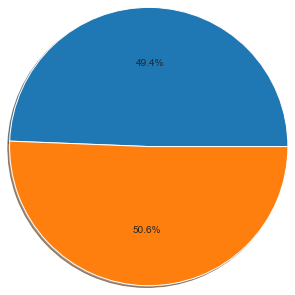

In [84]:
plt.pie([len(df_in["fee"]),len(df_out["fee"])],radius=1.6,shadow=True,autopct='%1.1f%%')

In [85]:
am_in=np.mean(df_in["age"])
am_out=np.mean(df_out["age"])

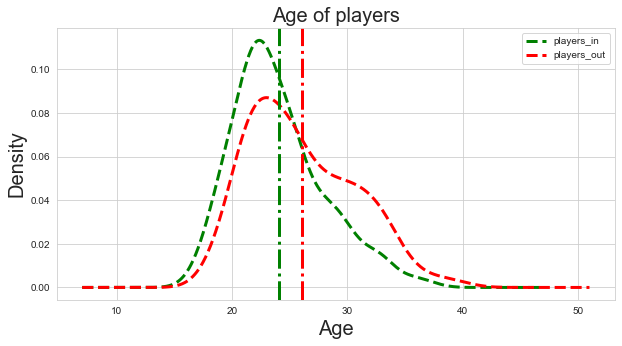

In [86]:
df_in["age"].plot(kind="kde",color="green",figsize=(10,5),linewidth=3,linestyle="--")
df_out["age"].plot(kind="kde",color="red",figsize=(10,5),linewidth=3,linestyle="--")
plt.axvline(x=am_in,linewidth=3,linestyle="-.",color="green")
plt.axvline(x=am_out,linewidth=3,linestyle="-.",color="red")
plt.title("Age of players",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Density",fontsize=20)
plt.legend(["players_in","players_out"])

In [87]:
Series([am_in,am_out],["in","out"])       #avg age of players in and out respectively

in     24.032374
out    26.028070
dtype: float64

In [128]:
dfp_in=(DataFrame(pd.get_dummies(df_in["position"])))
pos1=DataFrame(np.sum(dfp_in),columns=["position_in"])
dfp_out=(DataFrame(pd.get_dummies(df_out["position"])))
pos2=DataFrame(np.sum(dfp_out),columns=["position_out"])
pos1["position_out"]=pos2["position_out"]

In [129]:
def avg(df_t,pos,qnt): 
     return(np.mean(((df_t[df_t["position"]==pos])[qnt]).values))

In [130]:
avg(df_in,"Attacking Midfield","age")

23.583333333333332

In [143]:
a11=[]
a12=[]
a13=[]
a14=[]
f11=[]
f12=[]
f13=[]
f14=[]
for i in np.unique(df_in["position"]):
    a11=np.append(a11,avg(df_in,i,"age"))
    a12=np.append(a12,avg(df_out,i,"age"))
    a13=np.append(a13,sd(df_in,i,"age"))
    a14=np.append(a14,sd(df_out,i,"age"))
    f11=np.append(f11,avg(df_in,i,"fee_cleaned"))
    f12=np.append(f12,avg(df_out,i,"fee_cleaned"))
    f13=np.append(f13,sd(df_in,i,"fee_cleaned"))
    f14=np.append(f14,sd(df_out,i,"fee_cleaned"))

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [144]:
pos1["avg_age_in"]=a11
pos1["avg_age_out"]=a12
pos1["avg_fee_in"]=f11
pos1["avg_fee_out"]=f12
pos1["sd_age_in"]=a13
pos1["sd_age_out"]=a14
pos1["sd_fee_in"]=f13
pos1["sd_fee_out"]=f14

In [145]:
p_in=pos1["position_in"]/(pos1["position_in"]+pos1["position_out"])

In [146]:
pos1["prob_in"]=p_in

In [147]:
pos1

,position_in,position_out,avg_age_in,avg_age_out,avg_fee_in,avg_fee_out,prob_in,sd_age_in,sd_age_out,sd_fee_in,sd_fee_out
Attacking Midfield,12,9.0,23.583333,24.888889,2.992265,3.758393,0.571429,4.132359,4.886363,6.915182,4.117587
Central Midfield,44,43.0,23.795455,25.488372,5.599663,2.346217,0.505747,3.526391,3.943627,12.162746,3.176480
Centre-Back,40,41.0,23.750000,25.902439,5.135388,4.402957,0.493827,4.340219,4.863026,13.214553,12.285092
Centre-Forward,50,56.0,23.740000,25.678571,5.901518,3.678884,0.471698,4.009040,4.255698,10.276137,8.577519
Defensive Midfield,13,12.0,24.769231,27.833333,8.685783,3.666295,0.520000,2.390811,3.387067,17.049010,7.277894
Goalkeeper,29,30.0,26.551724,28.333333,1.777802,1.323197,0.491525,5.150067,6.122817,2.462931,2.305808
Left Midfield,4,5.0,21.750000,22.800000,6.952500,0.000000,0.444444,1.920286,1.600000,10.117572,0.000000
Left Winger,24,23.0,22.708333,24.913043,5.122500,7.200885,0.510638,2.637536,4.031539,7.647569,18.837584
Left-Back,14,17.0,24.928571,26.352941,4.590000,2.935084,0.451613,3.261557,3.661263,7.492814,3.495421
Midfielder,1,NaN,18.000000,NaN,4.465180,NaN,NaN,0.000000,NaN,0.000000,NaN


In [180]:
s=selction("hk","Right-Back",24,2)
s[2]

0.43073863636363635

In [183]:
p_sel=[]
for i in np.arange(len(df["fee"])):
    s=selction(df["player_name"][i],df["position"][i],df["age"][i],df["fee_cleaned"][i])
    p_sel=np.append(p_sel,s[2])

In [185]:
df["p_sel"]=p_sel

In [196]:
df.sort_values("p_sel",ascending=True)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season,p_sel
483,Norwich City,Steven Naismith,32,Second Striker,Heart of Midl.,0,out,4.46518,Premier League,2019,2019/2020,0.000625
557,Aston Villa,Ross McCormack,32,Second Striker,Without Club,0,out,0.00000,Premier League,2019,2019/2020,0.011875
492,Norwich City,Ben Marshall,28,Right Midfield,Without Club,0,out,0.00000,Premier League,2019,2019/2020,0.015833
519,Sheffield United,Mark Duffy,33,Right Midfield,Stoke City,0,out,0.00000,Premier League,2019,2019/2020,0.015833
365,AFC Bournemouth,Jermain Defoe,37,Centre-Forward,Rangers,0,in,0.00000,Premier League,2019,2019/2020,0.022406
...,...,...,...,...,...,...,...,...,...,...,...,...
34,Manchester City,Ryotaro Meshino,21,Attacking Midfield,Heart of Midl.,0,out,0.00000,Premier League,2019,2019/2020,0.515714
25,Manchester City,Manu García,21,Attacking Midfield,Sporting Gijón,£3.60m,out,3.60000,Premier League,2019,2019/2020,0.515714
232,Everton FC,Kieran Dowell,21,Attacking Midfield,Derby,0,out,0.00000,Premier League,2019,2019/2020,0.515714
326,Crystal Palace,Jason Puncheon,33,Attacking Midfield,Pafos FC,0,out,4.46518,Premier League,2019,2019/2020,0.515714


In [174]:
#funcion_box
def avg(df_t,pos,qnt): 
     return(np.mean(((df_t[df_t["position"]==pos])[qnt]).values)) 
    
    
def sd(df_t,pos,qnt): 
     return(np.sqrt(np.var(((df_t[df_t["position"]==pos])[qnt]).values)))
    
def selction(name,pos,age,fee):
    p1=pos1["prob_in"][pos]
    a1=pos1.T[pos]["avg_age_in"]
    sd1=pos1.T[pos]["sd_age_in"]
    age_ul=a1+3*sd1
    age_ll=a1-3*sd1
    if age>=age_ll and age<=age_ul:
        p2=.95
    else:
        p2=.05
    f1=pos1.T[pos]["avg_fee_in"]
    sd2=pos1.T[pos]["sd_fee_in"]
    fee_ul=f1+3*sd2
    fee_ll=f1-3*sd2
    if fee>=fee_ll and fee<=fee_ul:
        p3=.95
    else:
        p3=.05
    p=p1*p2*p3
    return(name,"the probabilty of your selection is ", p)

In [165]:
selction("hk","Right-Back",24,7)

hk the probabilty of your selection is  0.43073863636363635
